In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#!/bin/bash
!kaggle datasets download -d andrewmvd/animal-faces

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 97% 674M/696M [00:01<00:00, 268MB/s]
100% 696M/696M [00:02<00:00, 361MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/animal-faces.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    '/content/afhq/train',
    labels='inferred',
    label_mode='categorical',
    batch_size = 32,
    image_size = (256, 256)
)

val_ds = keras.utils.image_dataset_from_directory(
    '/content/afhq/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256)
)

Found 14630 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.


In [ ]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [ ]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

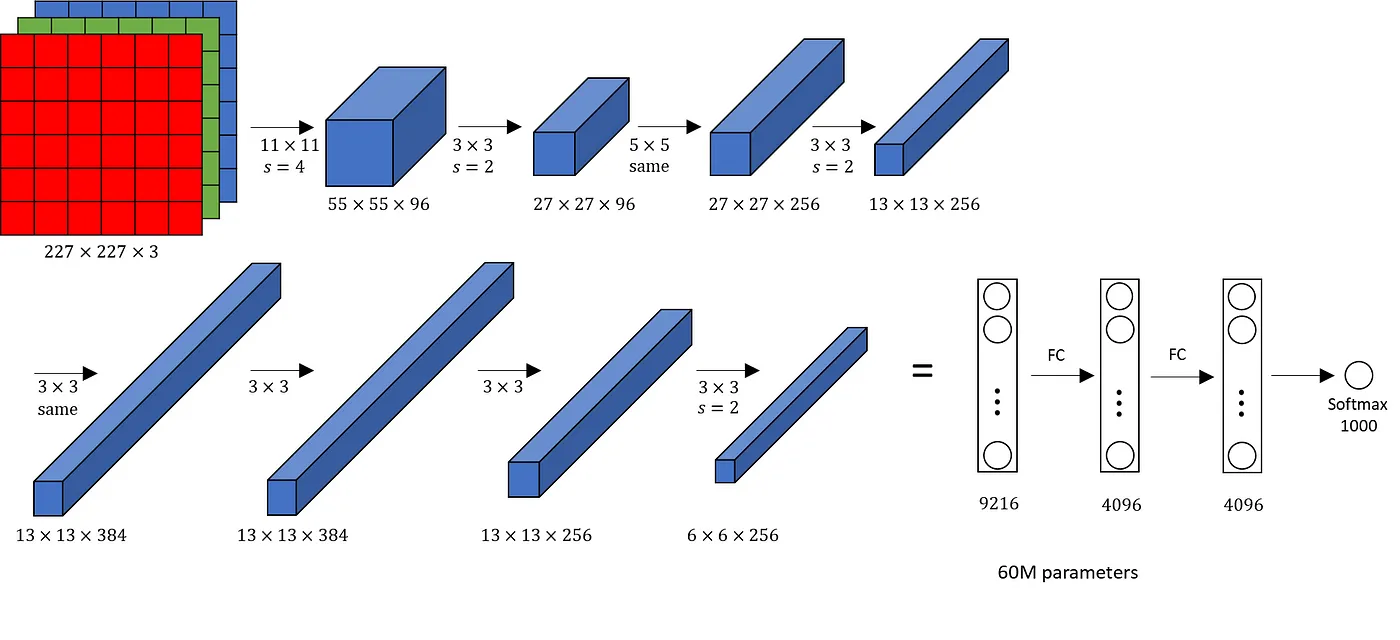

In [24]:
### Now This is the AlexNet Model

model = Sequential()

model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(256, kernel_size=(5,5), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(384, kernel_size=(3,3), padding='same', strides=(1,1),activation='relu'))

model.add(Conv2D(384, kernel_size=(3,3), padding='same', strides=(1,1), activation='relu'))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 25, batch_size=32, validation_data=val_ds)

Epoch 1/25
 29/458 ━━━━━━━━━━━━━━━━━━━━ 44:28 6s/step - accuracy: 0.3401 - loss: 2.4130

KeyboardInterrupt: 